# California Wildfire Analysis

## subtitle

#### sub-subtitle

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint # delete this? 
import calendar

In [2]:
# base url
url = "https://data.ca.gov/api/3/action/datastore_search?resource_id=d73ee828-c2c6-485c-91dc-c26bd9ce3991" 

# Build partial query URL
query_url = f"{url}&limit=1000"
response = requests.get(query_url).json()
records = response['result']['records']

# put records in dataframe
records_df = pd.DataFrame(records)
records_df

,_id,OBJECTID,Year,State,Agency,Unit ID,Fire Name,Local Incident Number,Alarm Date,Containment Date,...,Management Objective,GIS Calculated Acres,Comments,Complex Name,IRWIN ID,Fire Number (historical use),Complex ID,DECADES,Shape__Area,Shape__Length
0,1,1,2023,CA,CDF,SKU,WHITWORTH,00004808,6/17/2023 12:00:00 AM,6/17/2023 12:00:00 AM,...,1,5.729125,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,41407.83984375,1247.16603398886
1,2,2,2023,CA,LRA,BTU,KAISER,00010225,6/2/2023 12:00:00 AM,6/2/2023 12:00:00 AM,...,1,13.60238,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,93455.87890625,1285.51454971661
2,3,3,2023,CA,CDF,AEU,JACKSON,00017640,7/1/2023 12:00:00 AM,7/2/2023 12:00:00 AM,...,1,27.81446,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,183028.5,2697.58742917456
3,4,4,2023,CA,CDF,AEU,CARBON,00018821,7/11/2023 12:00:00 AM,7/11/2023 12:00:00 AM,...,1,58.76023,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},None,None,2020,388221.953125,2548.73877855158
4,5,5,2023,CA,CDF,AEU,LIBERTY,00018876,7/11/2023 12:00:00 AM,7/12/2023 12:00:00 AM,...,1,70.979,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},None,None,2020,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,996,2020,CA,CDF,BTU,5-4 POTTERS,00009702,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,...,1,925.4019,None,BUTTE LIGHTNING COMPLEX,{61AA84A0-8E88-4549-B694-BF14DD6E4CD4},None,00009692,2020,6307904.03515625,16613.4839078942
996,997,997,2020,CA,CDF,BTU,5-6 CASCADE CREEK,00009703,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,...,1,260.1756,None,BUTTE LIGHTNING COMPLEX,{06181DB5-96CA-4953-B34A-7C7A52E8EE3A},None,00009692,2020,1780346.8984375,7022.5749273688
997,998,998,2020,CA,CDF,BTU,TEDDY,00006891,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,...,1,13.27956,None,None,{394ABE8D-3020-47B2-9D03-0A0387418F9F},None,None,2020,90049.49609375,1648.63306678697
998,999,999,2020,CA,CDF,CZU,COAST,00003906,6/29/2020 12:00:00 AM,6/29/2020 12:00:00 AM,...,1,20.2083,None,None,{9E02079B-C8AD-491F-A246-B3104DAD326B},None,None,2020,128343.16015625,1702.00092173474


In [3]:
records_df.columns

Index(['_id', 'OBJECTID', 'Year', 'State', 'Agency', 'Unit ID', 'Fire Name',
       'Local Incident Number', 'Alarm Date', 'Containment Date', 'Cause',
       'Collection Method', 'Management Objective', 'GIS Calculated Acres',
       'Comments', 'Complex Name', 'IRWIN ID', 'Fire Number (historical use)',
       'Complex ID', 'DECADES', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [4]:
# drop columns
records_df = records_df.drop(columns=['_id', 'OBJECTID', 'Comments', 'Complex Name', 'IRWIN ID',
                                      'Fire Number (historical use)', 'Complex ID', 'Local Incident Number',
                                      'Agency', 'Unit ID', 'State', 'Collection Method', 'Management Objective', 'DECADES'])

# rename columns
renamed_df = records_df.rename(columns={'GIS Calculated Acres': 'Acres', 'Shape__Area': 'Area', 'Shape__Length':'Perimeter'})
renamed_df


,Year,Fire Name,Alarm Date,Containment Date,Cause,Acres,Area,Perimeter
0,2023,WHITWORTH,6/17/2023 12:00:00 AM,6/17/2023 12:00:00 AM,5,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,6/2/2023 12:00:00 AM,6/2/2023 12:00:00 AM,5,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,7/1/2023 12:00:00 AM,7/2/2023 12:00:00 AM,2,27.81446,183028.5,2697.58742917456
3,2023,CARBON,7/11/2023 12:00:00 AM,7/11/2023 12:00:00 AM,9,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,7/11/2023 12:00:00 AM,7/12/2023 12:00:00 AM,14,70.979,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...
995,2020,5-4 POTTERS,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,1,925.4019,6307904.03515625,16613.4839078942
996,2020,5-6 CASCADE CREEK,8/17/2020 12:00:00 AM,9/10/2020 12:00:00 AM,1,260.1756,1780346.8984375,7022.5749273688
997,2020,TEDDY,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,14,13.27956,90049.49609375,1648.63306678697
998,2020,COAST,6/29/2020 12:00:00 AM,6/29/2020 12:00:00 AM,7,20.2083,128343.16015625,1702.00092173474


In [5]:
# Convert 'Alarm Date' and 'Containment Date' columns to datetime format
renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])

# Extract date part only
renamed_df['Alarm Date'] = renamed_df['Alarm Date'].dt.date
renamed_df['Containment Date'] = renamed_df['Containment Date'].dt.date

# Convert 'Alarm Date' and 'Containment Date' columns back to datetime format
renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])

# Calculate duration in days and add as a new column
renamed_df['Fire Duration (Days)'] = (renamed_df['Containment Date'] - renamed_df['Alarm Date']).dt.days

new_order = ['Year', 'Fire Name', 'Alarm Date', 'Containment Date', 'Fire Duration (Days)', 'Cause', 'Acres', 'Area', 'Perimeter']

df_reordered = renamed_df[new_order]
df_reordered

C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\280306362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  renamed_df['Alarm Date'] = pd.to_datetime(renamed_df['Alarm Date'])
C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\280306362.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  renamed_df['Containment Date'] = pd.to_datetime(renamed_df['Containment Date'])


,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Acres,Area,Perimeter
0,2023,WHITWORTH,2023-06-17,2023-06-17,0.0,5,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,2023-06-02,2023-06-02,0.0,5,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,2023-07-01,2023-07-02,1.0,2,27.81446,183028.5,2697.58742917456
3,2023,CARBON,2023-07-11,2023-07-11,0.0,9,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,2023-07-11,2023-07-12,1.0,14,70.979,466456.0078125,5106.93652582734
...,...,...,...,...,...,...,...,...,...
995,2020,5-4 POTTERS,2020-08-17,2020-09-10,24.0,1,925.4019,6307904.03515625,16613.4839078942
996,2020,5-6 CASCADE CREEK,2020-08-17,2020-09-10,24.0,1,260.1756,1780346.8984375,7022.5749273688
997,2020,TEDDY,2020-06-18,2020-06-23,5.0,14,13.27956,90049.49609375,1648.63306678697
998,2020,COAST,2020-06-29,2020-06-29,0.0,7,20.2083,128343.16015625,1702.00092173474


In [6]:
# fire causes mapping dictionary
cause_mapping = {
    '1': 'Lightning',
    '2': 'Equipment Use',
    '3': 'Smoking',
    '4': 'Campfire',
    '5': 'Debris',
    '6': 'Railroad',
    '7': 'Arson',
    '8': 'Playing with fire',
    '9': 'Miscellaneous',
    '10': 'Vehicle',
    '11': 'Powerline',
    '12': 'Firefighter Training',
    '13': 'Non-Firefighter Training',
    '14': 'Unknown / Unidentified',
    '15': 'Structure',
    '16': 'Aircraft',
    '17': '',
    '18': 'Escaped Prescribed Burn',
    '19': 'Illegal Alien Campfire'
}

# replace cause values with causes
df_reordered['Cause'] = df_reordered['Cause'].replace(cause_mapping)

df_reordered.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Acres,Area,Perimeter
0,2023,WHITWORTH,2023-06-17,2023-06-17,0.0,Debris,5.729125,41407.83984375,1247.16603398886
1,2023,KAISER,2023-06-02,2023-06-02,0.0,Debris,13.60238,93455.87890625,1285.51454971661
2,2023,JACKSON,2023-07-01,2023-07-02,1.0,Equipment Use,27.81446,183028.5,2697.58742917456
3,2023,CARBON,2023-07-11,2023-07-11,0.0,Miscellaneous,58.76023,388221.953125,2548.73877855158
4,2023,LIBERTY,2023-07-11,2023-07-12,1.0,Unknown / Unidentified,70.979,466456.0078125,5106.93652582734


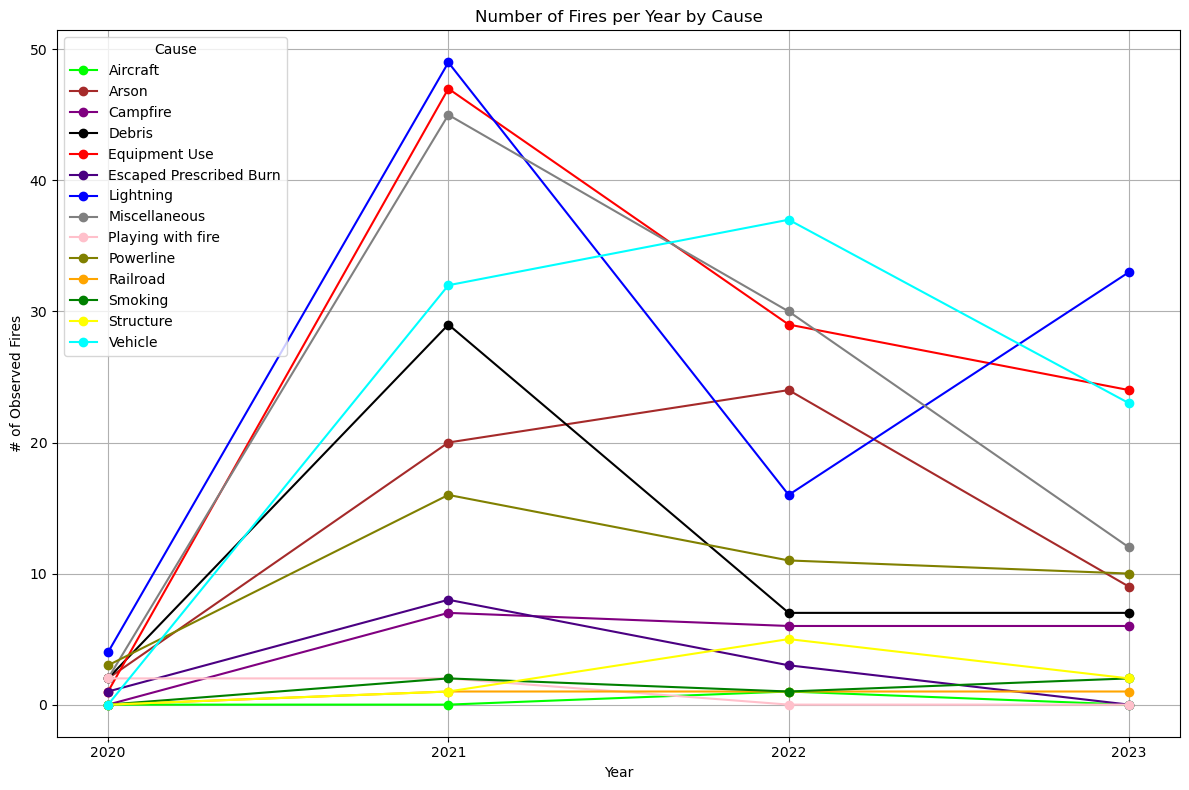

In [7]:
# Ensure 'Alarm Date' is in datetime format if not already done
df_reordered['Alarm Date'] = pd.to_datetime(df_reordered['Alarm Date'])

# Count total number of fires per year, excluding 'Unknown / Unidentified'
filtered_df = df_reordered[df_reordered['Cause'] != 'Unknown / Unidentified']
fires_per_year = filtered_df.groupby(['Year', 'Cause']).size().unstack(fill_value=0)

# Define colors for each cause
cause_colors = {
    'Lightning': 'blue',
    'Equipment Use': 'red',
    'Smoking': 'green',
    'Campfire': 'purple',
    'Debris': 'black',
    'Railroad': 'orange',
    'Arson': 'brown',
    'Playing with fire': 'pink',
    'Miscellaneous': 'gray',
    'Vehicle': 'cyan',
    'Powerline': 'olive',
    'Firefighter Training': 'teal',
    'Non-Firefighter Training': 'magenta',
    'Structure': 'yellow',
    'Aircraft': 'lime',
    'Escaped Prescribed Burn': 'indigo',
    'Illegal Alien Campfire': 'gold'
}

# Create a line plot for each cause
plt.figure(figsize=(12, 8))
for cause in fires_per_year.columns:
    if cause in cause_colors:
        plt.plot(fires_per_year.index, fires_per_year[cause], marker='o', label=cause, color=cause_colors[cause])

# Customize the plot
plt.title('Number of Fires per Year by Cause')
plt.xlabel('Year')
plt.ylabel('# of Observed Fires')
plt.legend(title='Cause')
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
# create dataframes based on year of alarm dates
df_reordered['Alarm Date'] = pd.to_datetime(df_reordered['Alarm Date'])

df_2020 = df_reordered[df_reordered['Alarm Date'].dt.year == 2020]
df_2021 = df_reordered[df_reordered['Alarm Date'].dt.year == 2021]
df_2022 = df_reordered[df_reordered['Alarm Date'].dt.year == 2022]
df_2023 = df_reordered[df_reordered['Alarm Date'].dt.year == 2023]


In [9]:
# list of dataframes
df_list = [df_2020, df_2021, df_2022, df_2023]

In [10]:
# sort the dataframes by alarm date
df_2020_sorted = df_2020.sort_values(by='Alarm Date')
df_2021_sorted = df_2021.sort_values(by='Alarm Date')
df_2022_sorted = df_2022.sort_values(by='Alarm Date')
df_2023_sorted = df_2023.sort_values(by='Alarm Date')

#reset indexes
df_2020_sorted = df_2020_sorted.reset_index(drop=True)
df_2021_sorted = df_2021_sorted.reset_index(drop=True)
df_2022_sorted = df_2022_sorted.reset_index(drop=True)
df_2023_sorted = df_2023_sorted.reset_index(drop=True)


In [11]:
df_2021_sorted.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Acres,Area,Perimeter
0,2021,MIGUEL 3,2021-01-07,2021-01-07,0.0,Unknown / Unidentified,21.31999,122097.42578125,1645.44525529025
1,2021,NEWTON,2021-01-08,2021-01-08,0.0,Unknown / Unidentified,2.265879,13399.23828125,443.870646367217
2,2021,NEWTON,2021-01-08,2021-01-08,0.0,Unknown / Unidentified,1.865689,11034.1484375,782.094252013949
3,2021,BORDER,2021-01-10,2021-01-21,11.0,Miscellaneous,1.850452,10579.1171875,504.822650768738
4,2021,BORDER 2,2021-01-13,2021-01-21,8.0,Debris,18.64428,106607.16796875,1924.43632122754


In [12]:
df_2021.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Acres,Area,Perimeter
590,2021,CALVERT,2021-03-01,2021-03-01,0.0,Escaped Prescribed Burn,257.8323,1638694.50390625,10145.6694378656
591,2021,MEISS,2021-04-05,2021-04-05,0.0,Debris,21.86377,159533.55859375,2282.70245243055
592,2021,REFUGE,2021-03-27,2021-03-29,2.0,Escaped Prescribed Burn,873.3917,6392786.796875,12370.0851729225
593,2021,BONNY COMPLEX,2021-01-19,2021-01-22,3.0,Miscellaneous,20.30736,129374.5859375,2331.54648284773
594,2021,FREEDOM,2021-01-19,2021-01-22,3.0,Powerline,33.25922,211295.828125,4130.55440998935


In [13]:
df_2021.columns

Index(['Year', 'Fire Name', 'Alarm Date', 'Containment Date',
       'Fire Duration (Days)', 'Cause', 'Acres', 'Area', 'Perimeter'],
      dtype='object')

C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\4166290119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])
C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\4166290119.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Month'] = df_2021['Alarm Date'].dt.month


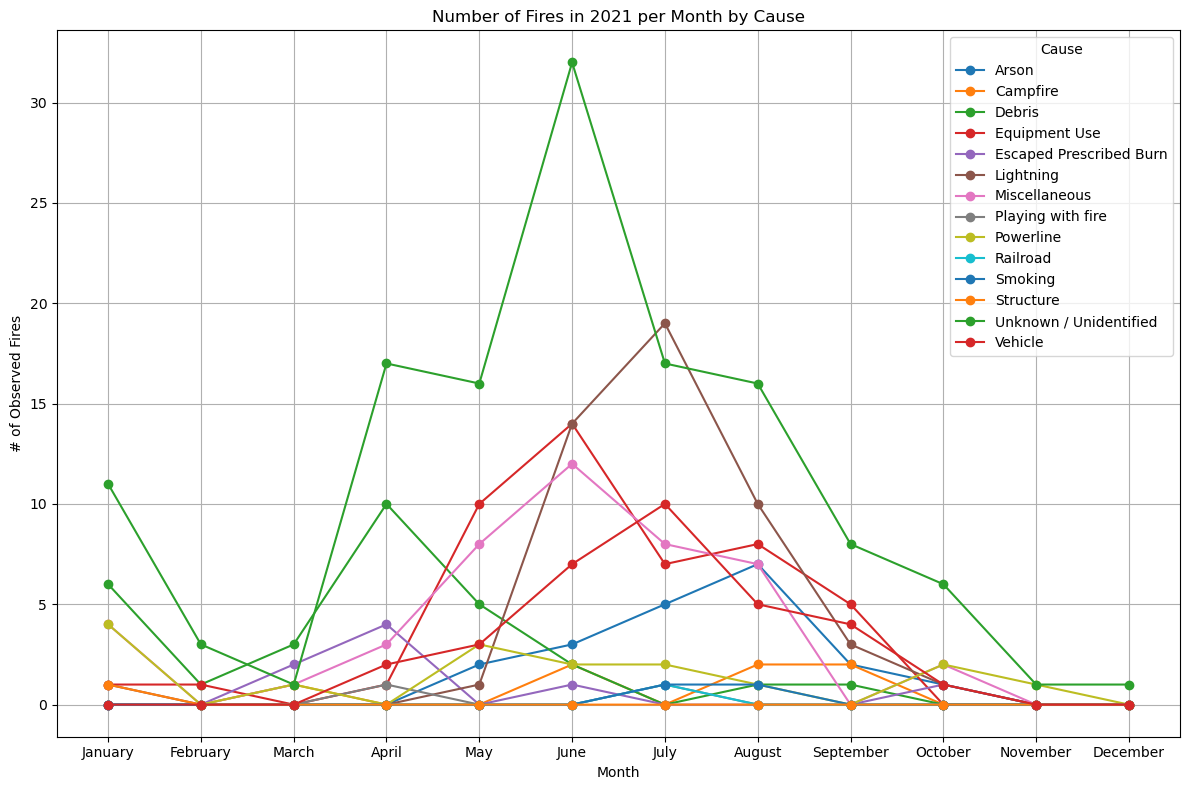

In [14]:
# plot number of fires per month by cause

# Ensure 'Alarm Date' is in datetime format
df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])

# Extract month from 'Alarm Date'
df_2021['Month'] = df_2021['Alarm Date'].dt.month

# Count total number of fires per month
fires_per_month = df_2021.groupby(['Month', 'Cause']).size().unstack(fill_value=0)

# Create a line plot for each cause
plt.figure(figsize=(12, 8))
fires_per_month.plot(kind='line', marker='o', ax=plt.gca())

# Customize the plot
plt.title('Number of Fires in 2021 per Month by Cause')
plt.xlabel('Month')
plt.ylabel('# of Observed Fires')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
plt.legend(title='Cause')
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\1814022725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])


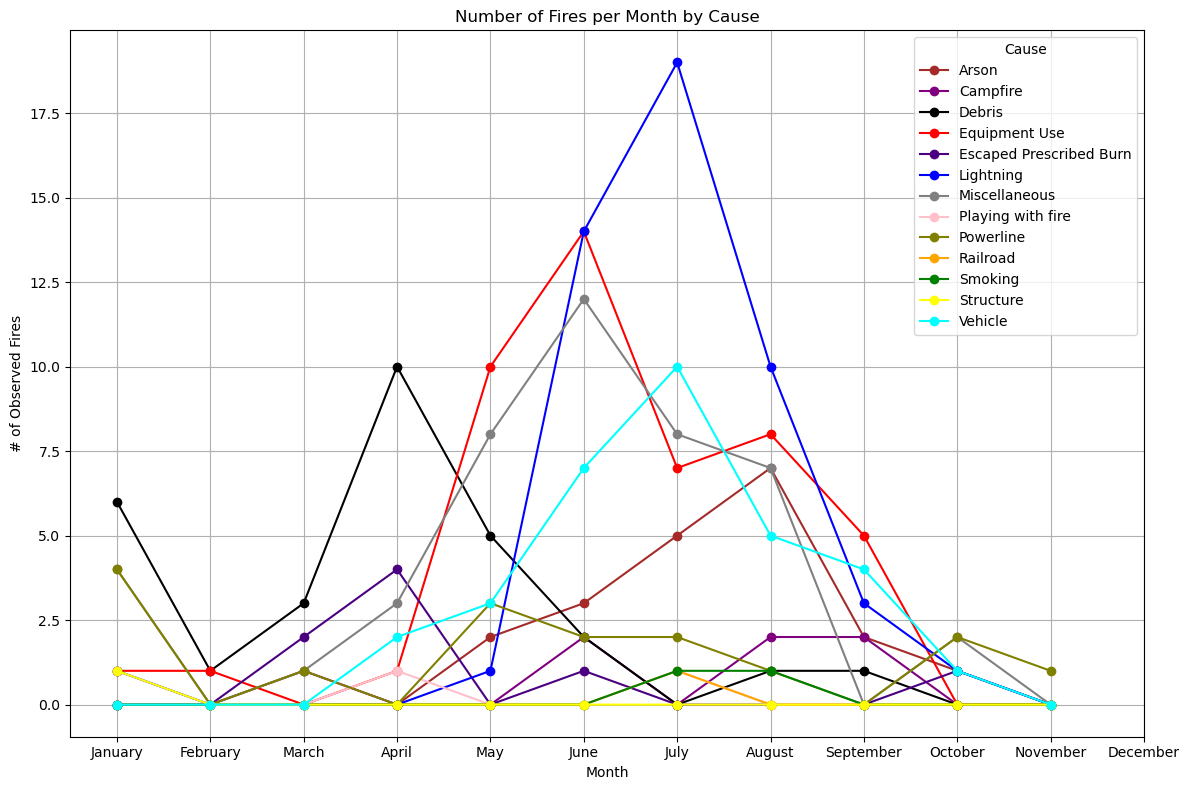

In [15]:
# plot number of fires per month by cause - exlude unknown cause data

# Ensure 'Alarm Date' is in datetime format
df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])

# Count total number of fires per month, excluding 'Unknown / Unidentified'
filtered_df = df_2021[df_2021['Cause'] != 'Unknown / Unidentified']
fires_per_month = filtered_df.groupby(['Month', 'Cause']).size().unstack(fill_value=0)

# Define colors for each cause, ensuring 'Debris' is black
cause_colors = {
    'Lightning': 'blue',
    'Equipment Use': 'red',
    'Smoking': 'green',
    'Campfire': 'purple',
    'Debris': 'black',
    'Railroad': 'orange',
    'Arson': 'brown',
    'Playing with fire': 'pink',
    'Miscellaneous': 'gray',
    'Vehicle': 'cyan',
    'Powerline': 'olive',
    'Firefighter Training': 'teal',
    'Non-Firefighter Training': 'magenta',
    'Structure': 'yellow',
    'Aircraft': 'lime',
    'Escaped Prescribed Burn': 'indigo',
    'Illegal Alien Campfire': 'gold'
}


# Create a line plot for each cause
plt.figure(figsize=(12, 8))
for cause in fires_per_month.columns:
    if cause in cause_colors:
        plt.plot(fires_per_month.index, fires_per_month[cause], marker='o', label=cause, color=cause_colors[cause])

# Customize the plot
plt.title('Number of Fires per Month by Cause')
plt.xlabel('Month')
plt.ylabel('# of Observed Fires')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
plt.legend(title='Cause')
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Display the plot
plt.tight_layout()
plt.show()

In [16]:
# dataframe for fire duration greater than 50 days
fifty_plus_fires_2021 = df_2021.loc[df_2021['Fire Duration (Days)'] > 50]
fifty_plus_fires_2021.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Acres,Area,Perimeter,Month
703,2021,COLD,2021-08-13,2021-10-03,51.0,Lightning,6.576556,42874.734375,3256.49704347236,8
707,2021,SENTINEL,2021-07-29,2021-10-25,88.0,Lightning,12.4895,78887.5703125,1434.66902525067,7
717,2021,KNP Complex,2021-09-10,2021-12-16,97.0,Lightning,88257.13,554850423.507813,490677.28228528,9
719,2021,SOUTHERN,2021-05-02,2022-05-06,369.0,Equipment Use,5365.902,30944913.9375,55683.4880261368,5
744,2021,TIVY,2021-09-07,2022-09-07,365.0,Equipment Use,25.03143,158204.33203125,2381.46088638041,9


In [17]:
# dataframe for fire duration greater than 30 days
thirty_plus_fires_2021 = df_2021.loc[df_2021['Fire Duration (Days)'] > 30]
thirty_plus_fires_2021.head()

,Year,Fire Name,Alarm Date,Containment Date,Fire Duration (Days),Cause,Acres,Area,Perimeter,Month
703,2021,COLD,2021-08-13,2021-10-03,51.0,Lightning,6.576556,42874.734375,3256.49704347236,8
706,2021,PORCUPINE,2021-07-02,2021-08-04,33.0,Lightning,11.19756,72742.02734375,1902.72272281316,7
707,2021,SENTINEL,2021-07-29,2021-10-25,88.0,Lightning,12.4895,78887.5703125,1434.66902525067,7
710,2021,COUNTY LINE,2021-07-01,2021-08-15,45.0,Lightning,224.9265,1462300.12109375,6674.04139330863,7
714,2021,LUKENS,2021-07-01,2021-08-19,49.0,Lightning,918.1719,5970996.61328125,25798.6922711374,7


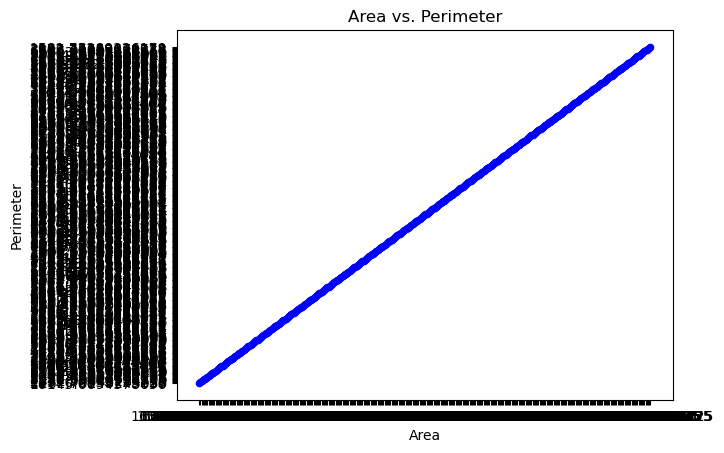

In [18]:
# scatterplot Area v Perimeter
x = 'Area'
y = 'Perimeter'

# Create scatter plot
df_2021.plot(kind='scatter', x=x, y=y, color='blue', title=f"{x} vs. {y}")

# Display plot
plt.show()

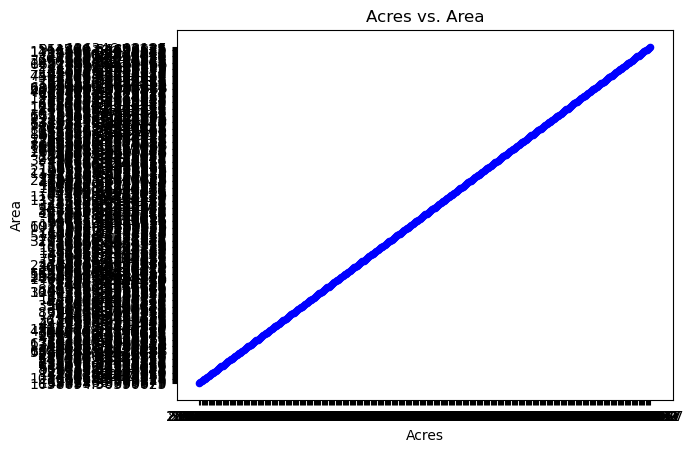

In [19]:
# scatterplot Acres v Area
x = 'Acres'
y = 'Area'

# Create scatter plot
df_2021.plot(kind='scatter', x=x, y=y, color='blue', title=f"{x} vs. {y}")

# Display plot
plt.show()

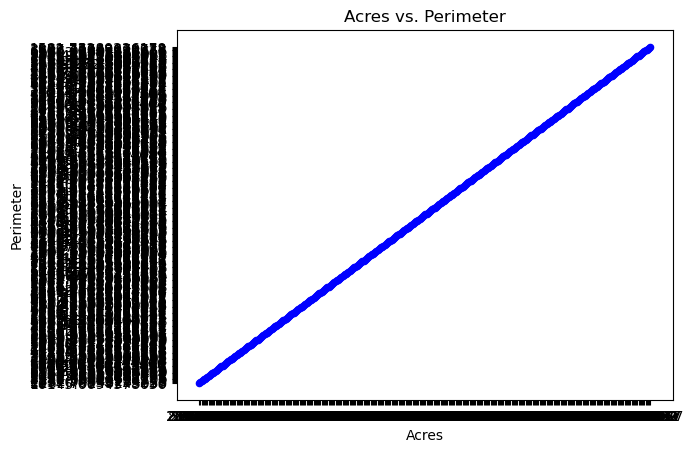

In [20]:
# scatterplot Acres v Perimeter
x = 'Acres'
y = 'Perimeter'

# Create scatter plot
df_2021.plot(kind='scatter', x=x, y=y, color='blue', title=f"{x} vs. {y}")

# Display plot
plt.show()

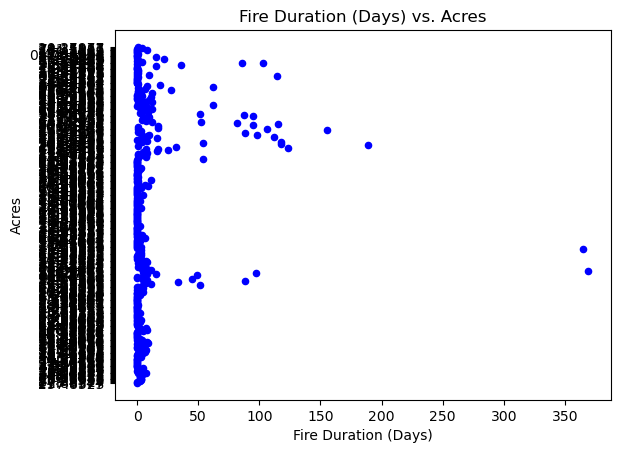

In [21]:
# scatterplot Fire Duration (Days) v Acres
x = 'Fire Duration (Days)'
y = 'Acres'

# Create scatter plot
df_2021.plot(kind='scatter', x=x, y=y, color='blue', title=f"{x} vs. {y}")

# Save the figure
plt.savefig("output/Fig4.png")

# Display plot
plt.show()

In [22]:
# max acres
df_2021_sorted['Acres'].max()

'97528.27'

In [23]:
# min acres
df_2021_sorted['Acres'].min()

'0.4009637'

In [24]:
# TEST

# Ensure 'Fire Duration (Days)', 'Acres', 'Area', and 'Perimeter' columns are numeric
df_2021['Fire Duration (Days)'] = pd.to_numeric(df_2021['Fire Duration (Days)'], errors='coerce')
df_2021['Acres'] = pd.to_numeric(df_2021['Acres'], errors='coerce')
df_2021['Area'] = pd.to_numeric(df_2021['Area'], errors='coerce')
df_2021['Perimeter'] = pd.to_numeric(df_2021['Perimeter'], errors='coerce')

# Group by 'Cause'
grouped_by_cause_2021 = df_2021.groupby('Cause')

# Aggregate to get the average and standard deviation for each metric
summary_2021_df = grouped_by_cause_2021.agg({
    'Fire Duration (Days)': ['mean', 'std'],
    'Acres': ['mean', 'std'],
    'Area': ['mean', 'std'],
    'Perimeter': ['mean', 'std']
}).reset_index()

# Flatten the MultiIndex columns
#summary_2021_df.columns = [' '.join(col).strip() for col in summary_2021_df.columns.values]

# Rename columns for clarity
summary_2021_df.columns = [
    'Cause', 
    'Average Duration (Days)', 'Std Dev Duration (Days)', 
    'Average Acres', 'Std Dev Acres', 
    'Average Area', 'Std Dev Area', 
    'Average Perimeter', 'Std Dev Perimeter'
]

# Display the resulting DataFrame
summary_2021_df

C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\2609105374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Fire Duration (Days)'] = pd.to_numeric(df_2021['Fire Duration (Days)'], errors='coerce')
C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\2609105374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Acres'] = pd.to_numeric(df_2021['Acres'], errors='coerce')
C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\2609105374.py:6: SettingWithCopyWarning: 
A value is trying to be set 

,Cause,Average Duration (Days),Std Dev Duration (Days),Average Acres,Std Dev Acres,Average Area,Std Dev Area,Average Perimeter,Std Dev Perimeter
0,Arson,1.450000,2.350252,496.167333,1906.594838,3.458368e+06,1.344918e+07,5530.193849,13665.795907
1,Campfire,3.571429,2.878492,157.180114,241.736281,9.284926e+05,1.407465e+06,5061.332606,4207.671140
2,Debris,1.551724,3.344358,63.460047,205.517487,3.989448e+05,1.274226e+06,2507.530553,2721.561935
3,Equipment Use,19.829787,75.959176,447.056213,1973.632243,2.994092e+06,1.365031e+07,5854.705837,13761.388882
4,Escaped Prescribed Burn,2.375000,3.248626,208.219648,283.383561,1.446292e+06,2.084064e+06,6233.024661,4607.902122
5,Lightning,37.571429,42.920954,22560.895770,52575.420897,1.559420e+08,3.692661e+08,106144.744364,265282.454746
6,Miscellaneous,7.577778,19.672880,178.325471,506.284730,1.110144e+06,3.118806e+06,4598.257193,6270.283361
7,Playing with fire,0.500000,0.707107,16.049347,14.835669,9.735432e+04,8.473346e+04,1349.645809,794.378022
8,Powerline,7.937500,25.449214,60263.045691,240837.981082,4.186322e+08,1.673129e+09,128262.877782,501873.931976
9,Railroad,0.000000,NaN,18.597380,NaN,1.131916e+05,NaN,10961.872343,NaN


In [25]:
# Ensure 'Fire Duration (Days)' and 'Acres' columns are numeric
df_2021['Fire Duration (Days)'] = pd.to_numeric(df_2021['Fire Duration (Days)'], errors='coerce')
df_2021['Acres'] = pd.to_numeric(df_2021['Acres'], errors='coerce')
df_2021['Area'] = pd.to_numeric(df_2021['Area'], errors='coerce')
df_2021['Perimeter'] = pd.to_numeric(df_2021['Perimeter'], errors='coerce')

# Group by 'Cause'
grouped_by_cause_2021 = df_2021.groupby('Cause')

# Aggregate to get the average fire duration and average acres for each cause
summary_2021_df = grouped_by_cause_2021.agg({'Fire Duration (Days)': 'mean', 'Acres': 'mean', 'Area': 'mean', 'Perimeter': 'mean'}).reset_index()

# Rename columns for clarity
summary_2021_df.columns = ['Cause', 'Average Duration (Days)', 'Average Acres', 'Average Area', 'Average Perimeter']

# Display the resulting DataFrame
summary_2021_df

# add standard dev column to this table


C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\1795936641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Fire Duration (Days)'] = pd.to_numeric(df_2021['Fire Duration (Days)'], errors='coerce')
C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\1795936641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Acres'] = pd.to_numeric(df_2021['Acres'], errors='coerce')
C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\1795936641.py:4: SettingWithCopyWarning: 
A value is trying to be set 

,Cause,Average Duration (Days),Average Acres,Average Area,Average Perimeter
0,Arson,1.450000,496.167333,3.458368e+06,5530.193849
1,Campfire,3.571429,157.180114,9.284926e+05,5061.332606
2,Debris,1.551724,63.460047,3.989448e+05,2507.530553
3,Equipment Use,19.829787,447.056213,2.994092e+06,5854.705837
4,Escaped Prescribed Burn,2.375000,208.219648,1.446292e+06,6233.024661
5,Lightning,37.571429,22560.895770,1.559420e+08,106144.744364
6,Miscellaneous,7.577778,178.325471,1.110144e+06,4598.257193
7,Playing with fire,0.500000,16.049347,9.735432e+04,1349.645809
8,Powerline,7.937500,60263.045691,4.186322e+08,128262.877782
9,Railroad,0.000000,18.597380,1.131916e+05,10961.872343


In [26]:
# return first and last dates alarm dates

first_alarm_date = df_2021_sorted['Alarm Date'].iloc[0]
last_alarm_date = df_2021_sorted['Alarm Date'].iloc[-1]

print(f"the first alarm date of 2021 is {first_alarm_date} and the last alarm date is {last_alarm_date}")

the first alarm date of 2021 is 2021-01-07 00:00:00 and the last alarm date is 2021-12-11 00:00:00


In [27]:
# group 2021 fire data by causes - SORTED dataframe
grouped_by_cause_21 = df_2021_sorted.groupby('Cause').size()

# sort
grouped_by_cause_21 = grouped_by_cause_21.sort_values(ascending=True)
grouped_by_cause_21

Cause
Railroad                     1
Structure                    1
Playing with fire            2
Smoking                      2
Campfire                     7
Escaped Prescribed Burn      8
Powerline                   16
Arson                       20
Debris                      29
Vehicle                     32
Miscellaneous               45
Equipment Use               47
Lightning                   49
Unknown / Unidentified     129
dtype: int64

In [28]:
# group 2021 fire data by causes - UNSORTED dataframe
grouped_by_cause_21_unsorted = df_2021.groupby('Cause').size()

# sort
grouped_by_cause_21_unsorted = grouped_by_cause_21_unsorted.sort_values(ascending=True)
grouped_by_cause_21_unsorted

Cause
Railroad                     1
Structure                    1
Playing with fire            2
Smoking                      2
Campfire                     7
Escaped Prescribed Burn      8
Powerline                   16
Arson                       20
Debris                      29
Vehicle                     32
Miscellaneous               45
Equipment Use               47
Lightning                   49
Unknown / Unidentified     129
dtype: int64

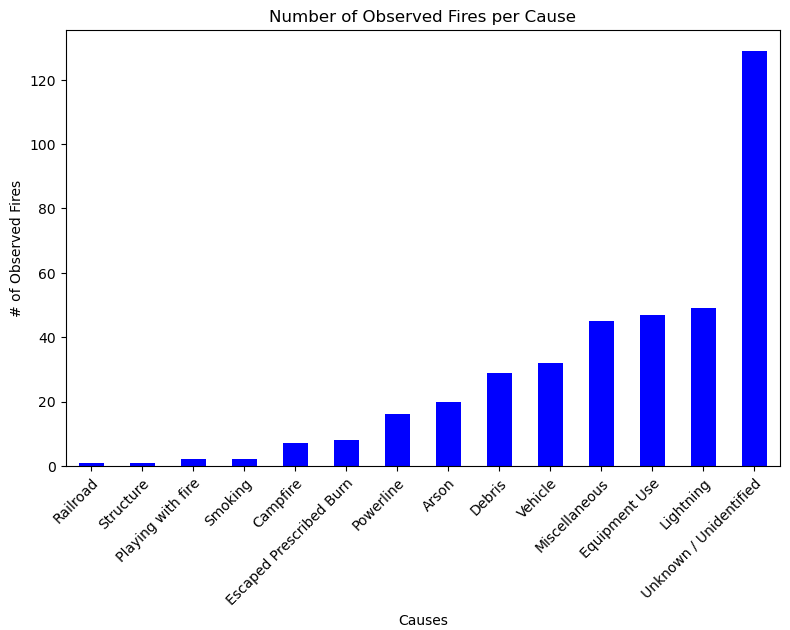

In [29]:
# bar plot for 2021
figure1 = grouped_by_cause_21.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Number of Observed Fires per Cause",
                                xlabel="Causes",
                                ylabel="# of Observed Fires")

# x-tick rotation
xticklabels = grouped_by_cause_21.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Save the figure
plt.savefig("output/Fig5.png")

# Resize plot to display labels
plt.tight_layout()
plt.show()

C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\4198748033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])
C:\Users\jenni\AppData\Local\Temp\ipykernel_21496\4198748033.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Month'] = df_2021['Alarm Date'].dt.month


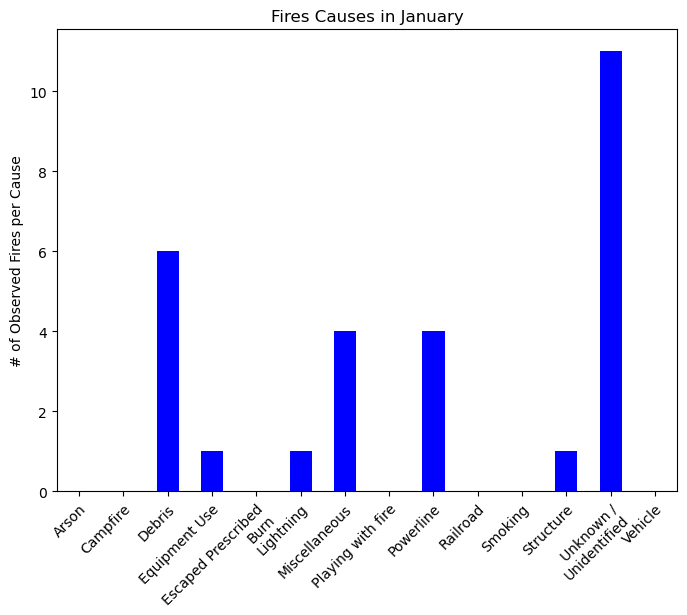

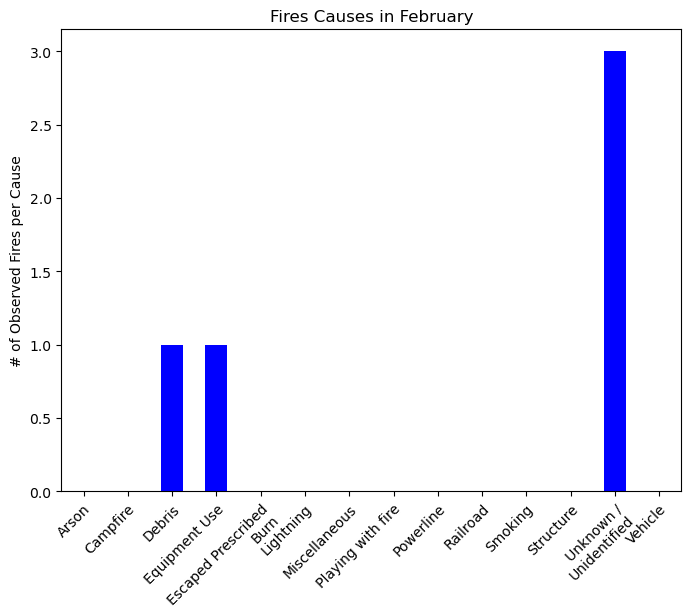

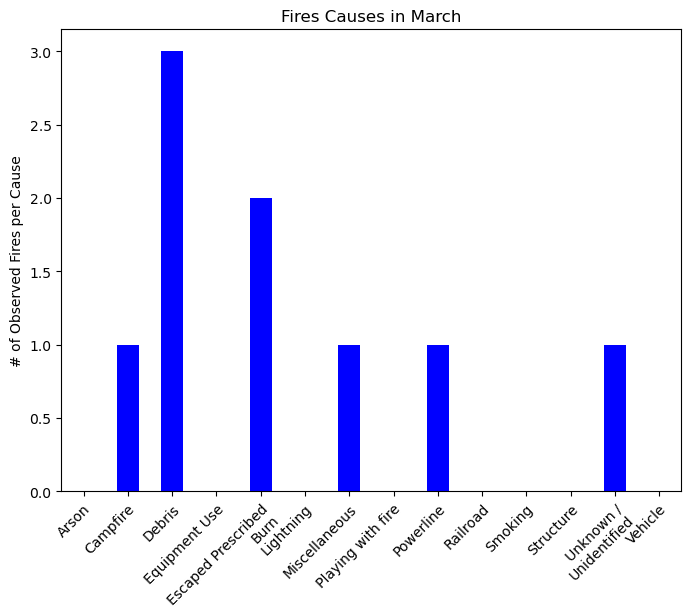

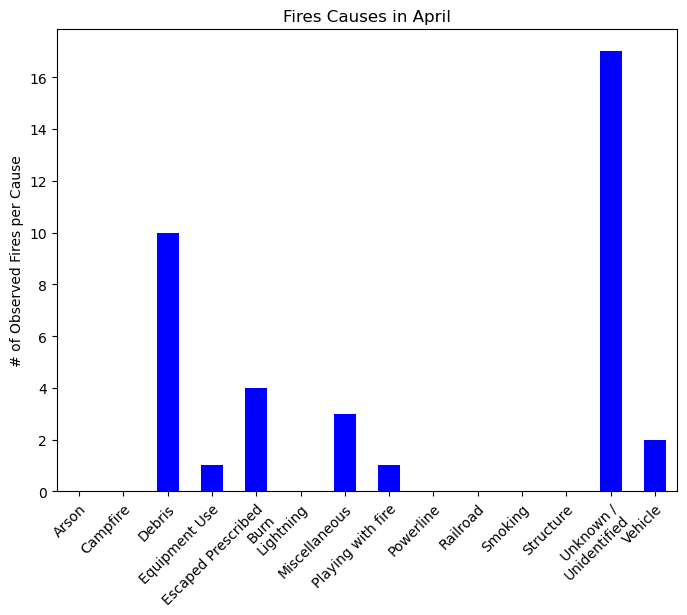

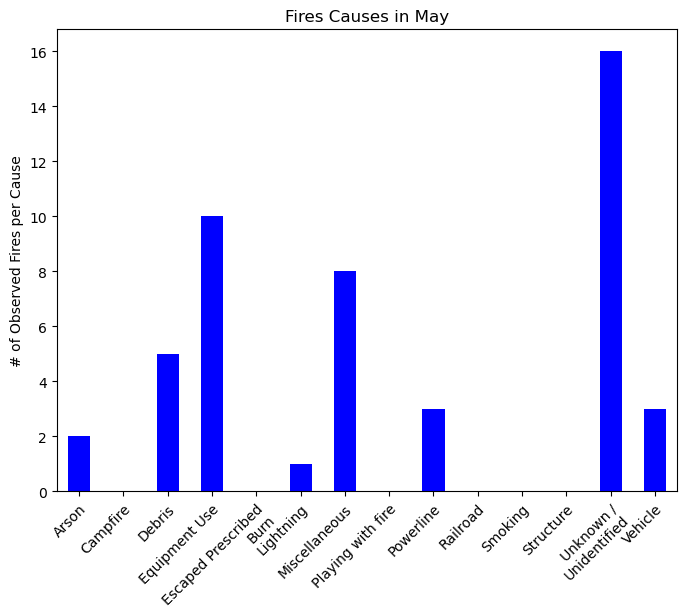

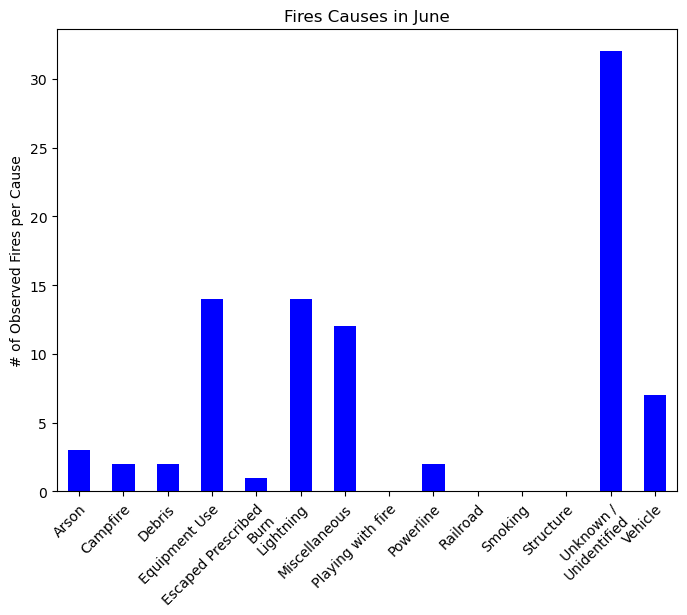

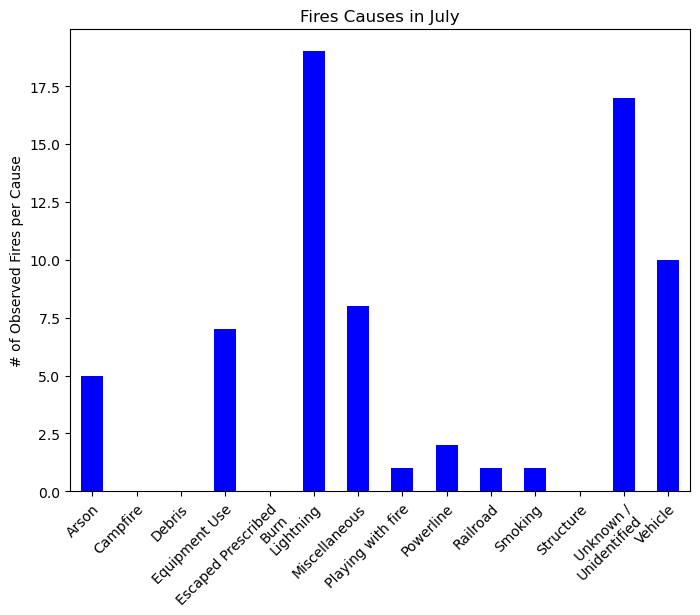

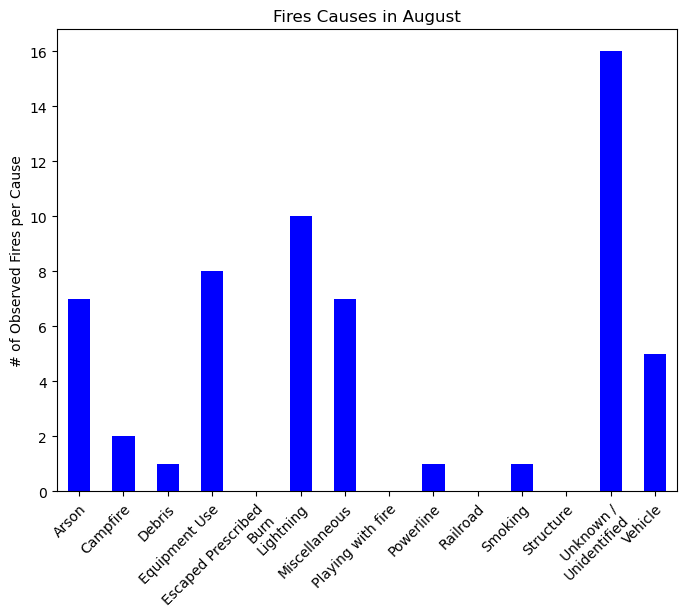

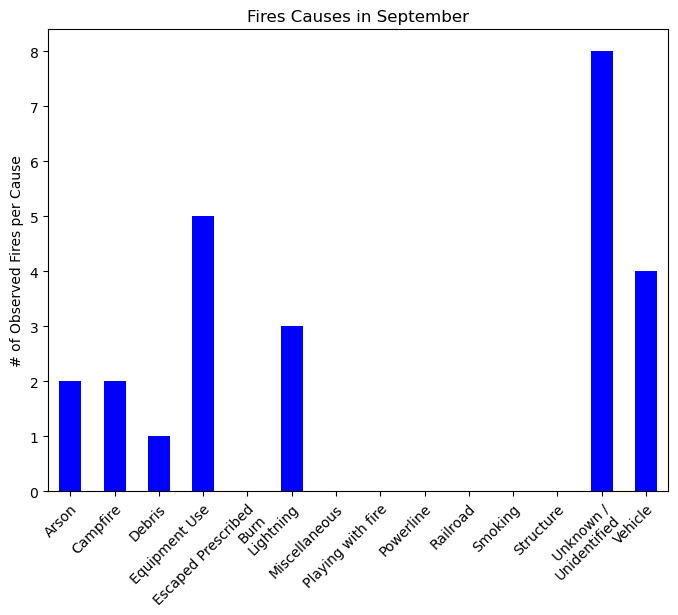

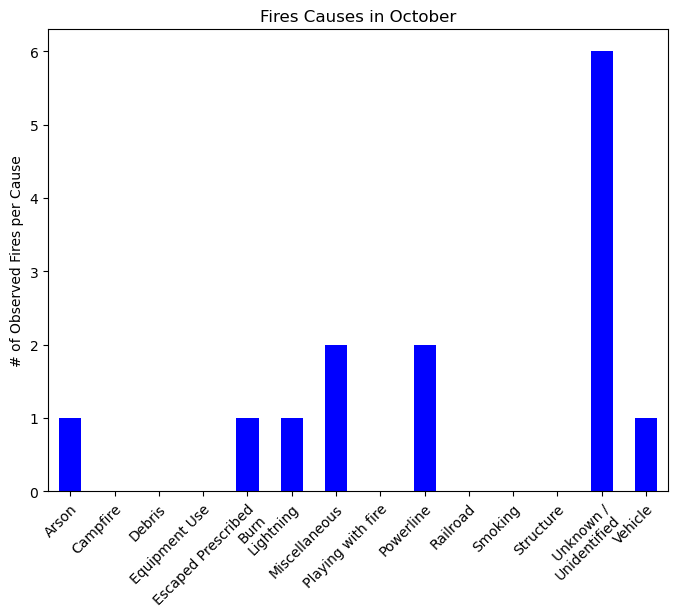

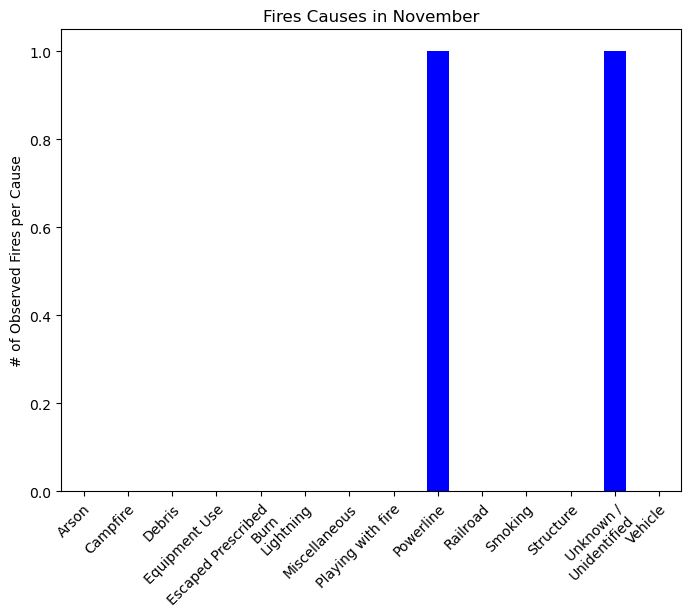

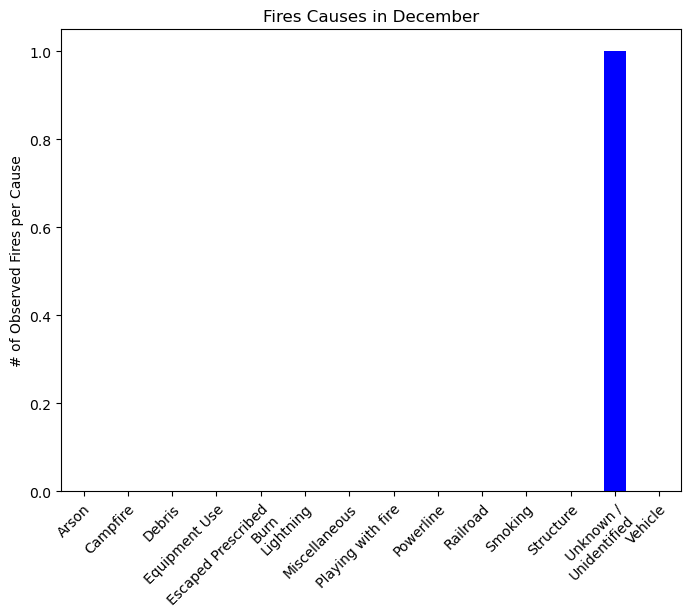

In [30]:
# bar charts per month of 2021 - may delete

# Convert 'Alarm Date' to datetime
df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])

# Extract the month from 'Alarm Date'
df_2021['Month'] = df_2021['Alarm Date'].dt.month

# Group by 'Cause' and 'Month'
grouped_by_cause_month = df_2021.groupby(['Month', 'Cause']).size().unstack(fill_value=0)

# Create bar plots for each month
for month in range(1, 13):
    month_name = calendar.month_name[month]  # Get the full month name
    figure = grouped_by_cause_month.loc[month].plot(kind="bar", facecolor="blue", figsize=(8, 6),
                                                    title=f"Fires Causes in {month_name}",
                                                    xlabel="Causes",
                                                    ylabel="# of Observed Fires per Cause")
    
    # x-tick rotation
    figure.set_xticklabels(grouped_by_cause_month.columns, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
    
    # Resize plot to display labels
    plt.show()

In [31]:
#output csv
df_2021.to_csv("output/fires_2021.csv", encoding="utf-8", index=False, header=True)